---
title: How does singular value decomposition (SVD) distinguish between dependent (hierarchical) and independent (modular) systems

author: Benjamin Doran

date: today

format: html
toc: true

---

In [134]:
#| echo: false
using StatsPlots
using LaTeXStrings
using LinearAlgebra

Biological systems are characterized by a high degree of dependence based on shared ancestral histories that form the background of all evolved life. This shared history of individual taxa forms degrees of similarity and co-variance between pairs of taxa. 

We find a direct mathematical relationship between these measures of similarity and the distribution of eigenvalues for a sampled extant population, i.e. the existing population at the current time. This relationship distinguishes different topologies of generative ancestries (hierarchical, modular, star) based solely on the diversity in existing populations.

## Motivation
Biology is different in respect to many physical and human engineered systems in that there are shared ancestries and lineages across the organisms living today. This shared history means that assumptions of sampling independence simply do not hold in comparisons of existing organisms.

As a simple but extreme example we can highlight the differences of a system with shared history in comparison to systems that do not have such systemic dependencies.

Let's start with a simple hierarchical generative process like we might see in biological populations. We start from an ancestral genotype "111111" and over time mutations accrue and are passed down to future generations. We model these mutations as bit flips, changing "1" to "0". After 2 generations we are left with a population with 4 heterogenous genotypes, $\{A, B, C, D\}$. In the real world, we do not typically have access to ancestral sequences, instead we are limited to sampling from the existing diversity of biology. The major question of phylogenetic biology is to try to infer solely from extant diversity the generative ancestry that produced this diversity.

|hierarchical ancestry|extant population|
|---|---|
|![Hierarchy](./10_SVD_math_report_files/figure-pdf/math_report/hierarchical.svg)|$$\begin{array}{cccccc}A:&1&0&1&1&0&1\\B:&1&0&1&1&1&0\\C:&0&1&0&1&1&1\\D:&0&1&1&0&1&1\\\end{array}$$|

To try to understand this relationship between existing diversity and the generative ancestry that produced this diversity, it can help to compare to examples that have very different generating ancestries.

So, in contrast to the hierarchical example above, we can also construct example populations that follow more extreme assumptions of independent sampling. 

First, we could imaging sampling from two entirely independent populations that have no shared ancestry at all. This is constructed by forming separate populations where the traits that describe one population are completely separate to the traits that describe the other. We can term this process as "modular" in the sense that one population is independent from the other and provides a self-contained description of itself in terms of genomic traits. Taking a balanced sample from these populations would provide a sampling process that looks like this:

|modular ancestry|extant population|
|---|---|
|![Modular case](./10_SVD_math_report_files/figure-pdf/math_report/modular.svg)|$$\begin{array}{ccccccc}A:&1&1&1&0&0&0\\B:&1&1&1&0&0&0\\C:&0&0&0&1&1&1\\D:&0&0&0&1&1&1\\\end{array}$$|

Next, we can  relax this constraint slightly to the case where there is a single common ancestor, but each existing organism has followed their own independent lineage to the current time. This would be equivalent to a "star tree" with one hub node.

|star ancestry|extant population|
|---|---|
|![Star case](./10_SVD_math_report_files/figure-pdf/math_report/star.svg)|$$\begin{array}{ccccccc}A:&1&1&0&1&1&1\\B:&1&1&1&0&1&1\\C:&1&1&1&1&0&1\\D:&1&1&1&1&1&0\\\end{array}$$|

These three cases form a simple starting point for attempting to discover how we can mathematically distinguish these generative ancestries simply by looking at the diversity of extant populations.

## Singular value decomposition



Any matrix $M$ can be written as the product of 3 matrices: $U$, left singular vectors (LSVs); $\Sigma$, singular values (SVs); and $V^t$ the transpose of the right singular vectors (RSVs). 

$$
\begin{align}
    M &= U\Sigma V^t
\end{align}
$$

As we will show, the distribution of the singular values $\Sigma$ is determined by the generative ancestries of the populations we defined above. So, how is this the case.



:::{.callout-note collapse=false}
#### Why is factorization useful?
Like taking a prime factorization of a number, we are splitting the matrix into a product of component parts that have useful special properties. 

In particular, $U$ and $V$ are unitary matrices such that $UU^T = VV^T = I$ where $I$ is the identity matrix (equivalent to "1" for matrices, so $IA = A$), and $\Sigma$ is a diagonal matrix meaning that it is trivially invertible, denoted: $\Sigma^{-1}$, making it easy to divide by $\Sigma$). 

These mathematical properties also allow for enhanced biological interpretation by grouping particular genomic traits or taxa together in these components as inferred genomic pathways and taxonomic clades.
:::

:::{.callout-note collapse=false}
#### SVD and PCA are (mostly) equivalent

Principal component analysis (PCA) generates a set of principal components $P$ for matrix $M$ based on a "rotation" matrix $R$.

$$
MR = P
$$

The biological interpretation is that combinations of genomic traits can be combined to place taxa into a set of orthogonal axes $P$, i.e., axes that are at right angles to each other, the xy plane is the most common example of orthogonal axes. These orthogonal axes are termed the principal components and are really the SVD's left singular vectors in disguise.

Starting from the SVD factorization 

$$
\begin{align}
M &= U \Sigma V^t \\
MV &= U \Sigma V^t V \\
MV &= U \Sigma \cancel{V^t V} \\
MV &= U \Sigma \\
MR &= P \\
\end{align}
$$

We can see from this rearrangement that the left singular vectors $U$ weighted by the singular values $\Sigma$ are equal to the principal components. Additionally, we see that the rotation matrix $R$ equals the right singular vectors $V$

$$
U\Sigma = P, R = V
$$

:::



Since SVD is intrinsically related to eigen decomposition via this relation 

$$
MM^T = U\Sigma V^t V \Sigma U^t = U\Sigma \cancel{V^t V} \Sigma U^t = U\Sigma\Sigma U^t = U \Sigma^2 U^t = C
$$

where $U$ are the eigenvectors and $\Sigma^2$ are the eigenvalues of $C$ (aka: $MM^t$), a common practice to analytically solve the SVD of a matrix is to find $U$ and $\Sigma^2$ of $MM^t$ and then solve for $V$ based on the relation

$$
\begin{align}
M^t &= V \Sigma U^t \\
M^t U\Sigma^{-1} &= V \cancel{\Sigma U^tU\Sigma^{-1}} \\
M^t U\Sigma^{-1} &= V
\end{align}
$$

Let's break this down further to see why this relates to the generative ancestries of the above populations. 

### what does $MM^t$ mean? 

#### Matrix multiplication and inner products

Matrix multiplication creates a new matrix containing the inner products (a measure of similarity) of all pairwise combinations of the left side matrix's rows and the right side matrix's columns. So when we take $MM^T$ we are creating a matrix of the pairwise similarity of each taxa in $M$. 

To really get an intuition for this matrix multiplication it is easiest to show an example so lets multiply two 2x2 matrices.

$$
\begin{align}
XY &= \begin{bmatrix} a&b \\ c&d \end{bmatrix}\begin{bmatrix} e&f \\ g&h \end{bmatrix} \\
&= \begin{bmatrix} ae + bg & af + bh \\ ce + dg & cf +dh \end{bmatrix} \\
&= Z \\
\end{align}
$$

Note that what we are doing here is taking the ith row of $X$ and the jth column of $Y$ and computing a inner product. for instance for the first element of $Z$, $Z_{1,1}$ can be represented in the following ways

$$Z_{i,j} = \vec{x}_{i}^t \vec{y}_{j} = \begin{bmatrix} a&b\end{bmatrix} \begin{bmatrix} e \\ g\end{bmatrix}  = ae + bg = \sum_k X_{i, k} Y_{k, j}$$

And $Z$ can be generically written as

$$
Z = \begin{bmatrix}
\vec{x}_{1}^t \vec{y}_{1} & \cdots & \vec{x}_{1}^t \vec{y}_{j} \\
\vdots & \ddots & \vdots \\
\vec{x}_{i}^t \vec{y}_{1} & \cdots & \vec{x}_{i}^t \vec{y}_{j} \\
\end{bmatrix}
$$

where $\vec{x}_{i}^t$ is the ith row of $X$ and $\vec{y}_{j}$ is the jth column of $Y$.

The inner product is a generalized measure of similarity. It describes the amount of $\vec{y}$ explained by $\vec{x}$. And under certain constraints this is exactly equal to the co-variance of $\vec{y}$ and $\vec{x}$, i.e. how much of the vectors $\vec{x}$ and $\vec{y}$ are pointing in the same direction, how much each element of the vectors $\vec{x}$ and $\vec{y}$ rise and fall in coordination.

#### Examples with different topologies

We can perform this calculation for each extant population to give some example and intuition for what we are computing.

If $M_h$ is our hierarchial extant population

$$
M_h = \begin{array}{cccccc}
    A: & 1 & 0 & 1 & 1 & 0 & 1 \\
    B: & 1 & 0 & 1 & 1 & 1 & 0 \\
    C: & 0 & 1 & 0 & 1 & 1 & 1 \\ 
    D: & 0 & 1 & 1 & 0 & 1 & 1 \\
\end{array}
$$

then 

$$
M_h M_h^t = \begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix}
= \begin{bmatrix}
    4 & 3 & 2 & 2 \\
    3 & 4 & 2 & 2 \\
    2 & 2 & 4 & 3 \\
    2 & 2 & 3 & 4 \\
\end{bmatrix}
$$

What we see in each element of the similarity matrix is a count of the genomic traits that have not changed between each pair of taxa. Basically a simple measure of genomic conservation.

Similarly for the modular case 

$$
M_m M_m^t = \begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix}
= \begin{bmatrix}
    3 & 3 & 0 & 0 \\
    3 & 3 & 0 & 0 \\
    0 & 0 & 3 & 3 \\
    0 & 0 & 3 & 3 \\
\end{bmatrix}
$$

and the star case

$$
M_m M_m^t = \begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix}
= \begin{bmatrix}
    5 & 4 & 4 & 4 \\
    4 & 5 & 4 & 4 \\
    4 & 4 & 5 & 4 \\
    4 & 4 & 4 & 5 \\
\end{bmatrix}
$$

Looking across these similarity matrices is our first indication of how the generative processes can be distinguished from these extant populations. Note how the modular case has clear block structure with zeros on the off-diagonals comparing taxa from the two independent genotypes. The star case has a constant value for all off-diagonals comparing each taxa. And the hierarchical population has a more complex off-diagonal structure with pairs of taxa that diverged after a second generation (AB, CD) having higher similarity as compared to the taxa that diverged after the first generation (AC, AD, BC, BD).

What we will see is that these off-diagonal values directly control the distribution of singular values for each population.

## Connecting similarity matrices to the distribution of singular values

To calculate the SVD of our matrix $M$ we will solve for the eigenvalues of $MM^t$. What this entails is finding the solutions to this equation:

$$
\det(C - I\lambda) = 0
$$

where $C = MM^t$; $I$ is the identity matrix; $\det$ is the determinant function; and $\lambda$ are the solutions to the equation, i.e. "eigenvalues"

:::{.callout-note collapse=false}
#### Why use the determinant for finding eigenvalues?

The determinant is a function that describes a change degrees of freedom after a linear transformation. 

It helps to understand that matrices in linear algebra describe transformation of space. If we multiply a vector by a matrix we will get a new vector that may be pointing in a new direction. 

$$
C\vec{u} = \vec{v}
$$

There are special vectors for each matrix $C$ that do *not* change direction after the transformation. Instead they may only change in magnitude. These are exactly the eigenvectors of the matrix, and the magnitude $\lambda$ is the eigenvalue. These eigenvectors and values are particularly important for describing the transformation and describing how points move through the transformation because they are the only stable axes during the transformation.

$$
C\vec{v} = \lambda\vec{v}
$$


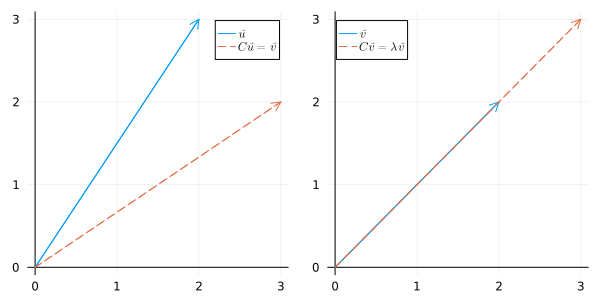

In [60]:
#| fig-cap: example of linear transformation on regular vector versus an eigen vector of that transformation
#| echo: false
plot(framestyle=:zerolines, )
plot!([0, 2], [0, 3]; arrow=true, label=L"\vec{u}")
p1 = plot!([0, 3], [0, 2]; linestyle=:dash, arrow=true, label=L"C\vec{u} = \vec{v}")

plot(framestyle=:zerolines,)
plot!([0, 2], [0, 2]; arrow=true, label=L"\vec{v}")
p2 = plot!(1.5 * [0, 2], 1.5 *  [0, 2]; linestyle=:dash, arrow=true, label=L"C\vec{v} = \lambda \vec{v}")
plot(p1, p2; link=:y, size=(600, 300))


To solve for the eigenvectors we can do some algebra to isolate $\vec{v}$

$$
\begin{align}
C\vec{v} &=  \lambda\vec{v} \\
C\vec{v} - \lambda\vec{v} &= 0 \\
C\vec{v} - I\lambda\vec{v} &= 0 \\
(C - I\lambda)\vec{v} &= 0 \\
\end{align}
$$

Note that because $\vec{v}$ equal to the zero vector is a trivial solution that is true for all matrices are generally defined as the non-zero solutions to this equation. So when is $\vec{v}$ non-zero?

Lets take a moment to assume that $(C - I\lambda)$ is invertible. Invertible means that there exists some matrix $(C - I\lambda)^{-1}$ that would completely reverse the transformation and place every vector back where it started. So $(C - I\lambda)(C - I\lambda)^{-1} = I$ 

If we place this inverse into the eigenvector equation from before we see that if $(C - I\lambda)$ is invertible than $\vec{v}$ **must** equal the zero vector. 

$$
\begin{align}
(C - I\lambda)\vec{v} &= 0 \\
(C - I\lambda)(C - I\lambda)^{-1}\vec{v} &= 0(C - I\lambda)^{-1} \\
I\vec{v} &= 0 \\
\vec{v} &= 0 \\
\end{align}
$$

From this we see that for $\vec{v}$ to be non-zero $(C - I\lambda)$ must be non-invertible. For a matrix to be non-invertible essentially means that at least 2 vectors are placed in the same location after the transformation $C\vec{u} = C\vec{w}$. In geometric terms, we can think of this as an reduction in dimensionality; a line being compressed into a single point, a plane being compressed into a line or point. 

We can then interpret our search for eigenvalues as searching for intrinsic dimensional scales. We can expand a sphere from the origin and at particular radii we are canceling out dimensional axes in our observed data, i.e. for particular values of $\lambda$ we are subtracting the full magnitude of a principal axis in our observed data which flattens all observations on that axis to zero.

The determinant function is how we measure this process. 

The determinant of a 2 x 2 matrix is defined as:

$$
\det{\begin{pmatrix} a & b \\ c & d \end{pmatrix}} = \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc
$$

And it is defined recursively for larger matrices.

$$
\det(C_{n\times n}) = \sum_{j=1}^n \sigma_j C_{1,j} \det(C_{-1, -j})
$$

where $\sigma_j$ is defined as $+1$ if $j$ is odd and $-1$ if $j$ is even; $C_{-1, -i}$ is an $n-1 \times n-1$ matrix made by removing the first row and ith column. 

For example, here is the first layer of recursion for a 3 x 3 matrix, which is defined as an alternating sum of 2 x 2 determinants weighted by the top row.

$$
\left|\begin{array}{ccc}
	a & b & c \\
	d & e & f \\
	g & h & i \\
\end{array}\right| \\
= a\left|\begin{array}{cc}e&f\\h&i\end{array}\right| -
	b\left|\begin{array}{cc}d&f\\g&i\end{array}\right| +
	c\left|\begin{array}{cc}d&e\\g&h\end{array}\right|
$$

Expanded fully, the determinant forms a sum of $n!$ products where $n$ is the number of columns in the matrix.

$$
aei - afh - bdi + bfg + cdh - ceg
$$

The geometric interpretation behind the determinant is that it measures the area of the unit square after a transformation by matrix $C$, or the volume change of the unit cube in the 3x3 case. The key point is that for non-invertible matrices the determinant equals zero.


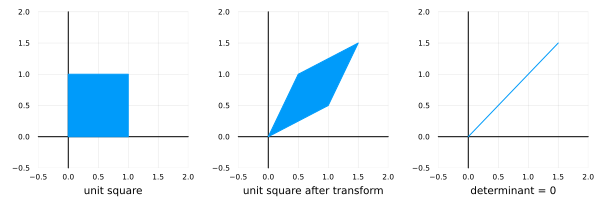

In [94]:
#| echo: false
#| fig-cap: example of unit square after different linear transforms. The last case (right) shows example of the 2d plane being compressed to a single line at which point the determinant equals zero
plot(framestyle=:zerolines, lims=(-.5, 2))
p1 = plot!([(0, 0), (0, 1), (1,1), (1, 0), (0,0)]; 
    fill=0, 
    xlabel="unit square",
    label="",
)

plot(framestyle=:zerolines, lims=(-.5, 2), legend=:topright)
p2 = plot!([(0, 0), (.5, 1), (1.5,1.5), (1, .5), (0,0)];
     fill=0, 
     xlabel="unit square after transform",
     label="",
)

plot(framestyle=:zerolines, lims=(-.5, 2), legend=:topright)
p3 = plot!([(0, 0), (.5, .5), (1.5,1.5), (.5, .5), (0,0)];
    fill=0, 
    xlabel="determinant = 0",
    label="",
)
plot(p1, p2, p3; link=:y, layout=grid(1,3), 
    size=(600, 200),
    tickfontsize=5, 
    xlabelfontsize=7, 
    bottommargin=2Plots.Measures.mm)


$\det(A) = 0:$ if $A^{-1}$ does not exist

The determinant equals zero because if a dimension is being canceled out the unit square, cube, hyper-cube, etc. no longer has enough dimensions hold that dimensionality of space, e.g. The area of a line is zero, the volume of a plane is zero.

So, coming back the the eigenvector equation, since we know that the only possible solutions are when $(C - I\lambda)$ is not invertible, we can check that with the equation

$$
\det(C - I\lambda) = 0
$$

The values of $\lambda$ that solve of this equation are the change of magnitude of the eigenvectors in the original eigenvector equation $C\vec{v} = \lambda\vec{v}$. So these values of $\lambda$ are the eigenvalues.

:::


### Expanding the determinant to solve for eigenvalues

If we expand this eigenvalue equation for our example populations of generative ancestries, we can get a better sense of what the determinant is doing to our similarity matrices.

Starting from

$$
\det(C - I\lambda) = 0
$$

We can set $C$ as the generic similarity matrix for now and replace the elements of the matrix with the values found under different generating processes later so that we only need to go through the algebra once. Remember that

$$
MM^t = C = \begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix}
$$

The matrix multiplication of $MM^t$ creates an $n \times n$ similarity matrix. where the similarity is measured as the inner product of pairwise combination of row. In our population matrices these rows represent each extant taxon that we sampled. 

We can insert this matrix into our eigenvalue equation
 
$$
\det \left(\begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix} - I\lambda \right) = 0
$$

Change notation of determinant to make things visually cleaner 

$$
\left|\begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix} - I\lambda \right| = 0
$$

expand $I\lambda$ 

$$
\left|\begin{bmatrix}
    A^tA & A^tB & A^tC & A^tD \\
    B^tA & B^tB & B^tC & B^tD \\
    C^tA & C^tB & C^tC & C^tD \\
    D^tA & D^tB & D^tC & D^tD \\
\end{bmatrix} -\begin{bmatrix}
    \lambda & 0 & 0 & 0 \\
    0 & \lambda & 0 & 0 \\
    0 & 0 & \lambda & 0 \\
    0 & 0 & 0 & \lambda \\
\end{bmatrix} \right| = 0
$$

Perform subtraction

$$
\left| \begin{bmatrix}
    A^tA - \lambda & A^tB & A^tC & A^tD \\
    B^tA & B^tB - \lambda & B^tC & B^tD \\
    C^tA & C^tB & C^tC - \lambda & C^tD \\
    D^tA & D^tB & D^tC & D^tD - \lambda \\
\end{bmatrix} \right| = 0
$$

This is the actual matrix that we are now taking the determinant of. Note that we now have the variable $\lambda$ inside the matrix. So instead of getting back a concrete single value. As we expand out the recursive determinant functions we will be getting a polynomial of $\lambda$. This polynomial is termed the "characteristic polynomial" of the matrix. And it is in this polynomial we find the connection between the similarity matrices and the distribution of eigenvalues and singular values. 

Just like with the 3x3 example we can expand the determinant recursively as a sum of $n-1$ determinants.

$$
\det(C - I\lambda) = \left|\begin{bmatrix}
    A^tA - \lambda & A^tB & A^tC & A^tD \\
    B^tA & B^tB - \lambda & B^tC & B^tD \\
    C^tA & C^tB & C^tC - \lambda & C^tD \\
    D^tA & D^tB & D^tC & D^tD - \lambda \\
\end{bmatrix}\right| = 0
$$

We will skip over some of the steps of the expansion because it is fairly long and we are dealing with $4! = 24$ terms versus the $3! = 6$ terms from the 3x3 case example from above. The steps are exactly the same, simply with an extra layer of recursion.

After using the commutative property to expand and rearranging terms by order of $\lambda$ we are left with these 24 terms. 

$$
\small{
\begin{align*}
det(C - λI) = \\
&\text{up to 4th order terms}\\
&+(A^tA - \lambda)(B^tB - \lambda)(C^tC - \lambda)(D^tD - \lambda) \\
&\text{up to 2nd order terms}\\
&-(A^tA - \lambda)(B^tB - \lambda)(C^tD)(D^tC) \\
&-(A^tA - \lambda)(B^tC)(C^tB)(D^tD - \lambda) \\
&-(A^tA - \lambda)(B^tD)(C^tC - \lambda)(D^tB) \\
&-(A^tB)(B^tA)(C^tC - \lambda)(D^tD - \lambda) \\
&-(A^tC)(B^tB - \lambda)(C^tA)(D^tD - \lambda) \\
&-(A^tD)(B^tB - \lambda)(C^tC - \lambda)(D^tA) \\
&\text{up to 1st order terms}\\
&+(A^tA - \lambda)(B^tC)(C^tD)(D^tB) \\
&+(A^tA - \lambda)(B^tD)(C^tB)(D^tC) \\
&+(A^tB)(B^tC)(C^tA)(D^tD - \lambda) \\
&+(A^tB)(B^tD)(C^tC - \lambda)(D^tA) \\
&+(A^tC)(B^tA)(C^tB)(D^tD - \lambda) \\
&+(A^tC)(B^tB - \lambda)(C^tD)(D^tA) \\
&+(A^tD)(B^tA)(C^tC - \lambda)(D^tB) \\
&+(A^tD)(B^tB - \lambda)(C^tA)(D^tC) \\
&\text{up to 0th order terms}\\
&-(A^tB)(B^tC)(C^tD)(D^tA) \\
&-(A^tB)(B^tD)(C^tA)(D^tC) \\
&-(A^tC)(B^tA)(C^tD)(D^tB) \\
&-(A^tC)(B^tD)(C^tB)(D^tA) \\
&-(A^tD)(B^tA)(C^tB)(D^tC) \\
&-(A^tD)(B^tC)(C^tA)(D^tB) \\
&+(A^tB)(B^tA)(C^tD)(D^tC) \\
&+(A^tC)(B^tD)(C^tA)(D^tB) \\
&+(A^tD)(B^tC)(C^tB)(D^tA) \\
\end{align*}}
$$

These $24$ terms are the determinant of any 4x4 matrix. The only difference is the values that get substituted in for a *particular* 4x4 matrix. To clarify, the first term of the determinant is always $(A^tA - \lambda)(B^tB - \lambda)(C^tC - \lambda)(D^tD - \lambda)$ the product of the diagonal elements of the matrix, but for a particular 4x4 matrix we can substitute the values in the diagonal to see what this term equals for that matrix.

We will further expand these to get the characteristic polynomial of each generative ancestry in a moment, but already we can see some interesting properties when we substitute the values for our different generative ancestries.

$$
\small{
\begin{matrix*}[l]
&\text{\normalsize{\bf Hierarchical}}  & \text{\normalsize{\bf Star}}  & \text{\normalsize{\bf Modular}} \\
&\text{up to 4th order terms} & \text{up to 4th order terms} & \text{up to 4th order terms} \\
&+(4 - \lambda)(4 - \lambda)(4 - \lambda)(4 - \lambda)  & +(5 - \lambda)(5 - \lambda)(5 - \lambda)(5 - \lambda)  & +(3 - \lambda)(3 - \lambda)(3 - \lambda)(3 - \lambda) \\
&\text{up to 2nd order terms} & \text{up to 2nd order terms} & \text{up to 2nd order terms} \\
&-(4 - \lambda)(4 - \lambda)(3)(3)  & -(5 - \lambda)(5 - \lambda)(4)(4)  & -(3 - \lambda)(3 - \lambda)(3)(3) \\
&-(4 - \lambda)(2)(2)(4 - \lambda)  & -(5 - \lambda)(4)(4)(5 - \lambda)  & -(3 - \lambda)(0)(0)(3 - \lambda) \\
&-(4 - \lambda)(2)(4 - \lambda)(2)  & -(5 - \lambda)(4)(5 - \lambda)(4)  & -(3 - \lambda)(0)(3 - \lambda)(0) \\
&-(3)(3)(4 - \lambda)(4 - \lambda)  & -(4)(4)(5 - \lambda)(5 - \lambda)  & -(3)(3)(3 - \lambda)(3 - \lambda) \\
&-(2)(4 - \lambda)(2)(4 - \lambda)  & -(4)(5 - \lambda)(4)(5 - \lambda)  & -(0)(3 - \lambda)(0)(3 - \lambda) \\
&-(2)(4 - \lambda)(4 - \lambda)(2)  & -(4)(5 - \lambda)(5 - \lambda)(4)  & -(0)(3 - \lambda)(3 - \lambda)(0) \\
&\text{up to 1st order terms} & \text{up to 1st order terms} & \text{up to 1st order terms}\\
&+(4 - \lambda)(2)(3)(2)  & +(5 - \lambda)(4)(4)(4)  & +(3 - \lambda)(0)(3)(0) \\
&+(4 - \lambda)(2)(2)(3)  & +(5 - \lambda)(4)(4)(4)  & +(3 - \lambda)(0)(0)(3) \\
&+(3)(2)(2)(4 - \lambda)  & +(4)(4)(4)(5 - \lambda)  & +(3)(0)(0)(3 - \lambda) \\
&+(3)(2)(4 - \lambda)(2)  & +(4)(4)(5 - \lambda)(4)  & +(3)(0)(3 - \lambda)(0) \\
&+(2)(3)(2)(4 - \lambda)  & +(4)(4)(4)(5 - \lambda)  & +(0)(3)(0)(3 - \lambda) \\
&+(2)(4 - \lambda)(3)(2)  & +(4)(5 - \lambda)(4)(4)  & +(0)(3 - \lambda)(3)(0) \\
&+(2)(3)(4 - \lambda)(2)  & +(4)(4)(5 - \lambda)(4)  & +(0)(3)(3 - \lambda)(0) \\
&+(2)(4 - \lambda)(2)(3)  & +(4)(5 - \lambda)(4)(4)  & +(0)(3 - \lambda)(0)(3) \\
&\text{up to 0th order terms} & \text{up to 0th order terms} & \text{up to 0th order terms} \\
&-(3)(2)(3)(2)  & -(4)(4)(4)(4)  & -(3)(0)(3)(0) \\
&-(3)(2)(2)(3)  & -(4)(4)(4)(4)  & -(3)(0)(0)(3) \\
&-(2)(3)(3)(2)  & -(4)(4)(4)(4)  & -(0)(3)(3)(0) \\
&-(2)(2)(2)(2)  & -(4)(4)(4)(4)  & -(0)(0)(0)(0) \\
&-(2)(3)(2)(3)  & -(4)(4)(4)(4)  & -(0)(3)(0)(3) \\
&-(2)(2)(2)(2)  & -(4)(4)(4)(4)  & -(0)(0)(0)(0) \\
&+(3)(3)(3)(3)  & +(4)(4)(4)(4)  & +(3)(3)(3)(3) \\
&+(2)(2)(2)(2)  & +(4)(4)(4)(4)  & +(0)(0)(0)(0) \\
&+(2)(2)(2)(2)  & +(4)(4)(4)(4)  & +(0)(0)(0)(0) \\
\end{matrix*}}
$$

Note how any terms in the modular case that compare taxa that are independent are zeroed out. Leaving only 4 remaining terms

$$
\small{\begin{matrix*}[l]
&\text{up to 4th order terms} & \text{up to 4th order terms}\\
&+(A^tA - \lambda)(B^tB - \lambda)(C^tC - \lambda)(D^tD - \lambda)  & +(3 - \lambda)(3 - \lambda)(3 - \lambda)(3 - \lambda) \\
&\text{up to 2nd order terms} & \text{up to 2nd order terms}\\
&-(A^tA - \lambda)(B^tB - \lambda)(C^tD)(D^tC)  & -(3 - \lambda)(3 - \lambda)(3)(3) \\
&-(A^tB)(B^tA)(C^tC - \lambda)(D^tD - \lambda)  & -(3)(3)(3 - \lambda)(3 - \lambda) \\
&\text{up to 0th order terms} & \text{up to 0th order terms}\\
&+(A^tB)(B^tA)(C^tD)(D^tC)  & +(3)(3)(3)(3) \\
\end{matrix*}}
$$


We can take the remaining terms of the modular case and further expand them to polynomials with respect to the variable $\lambda$. We get these expanded terms.

$$
\begin{align*}
+ λ^4 - 12 λ^3 + 54 λ^2 - 108 λ + 81 & \\
- 9 λ^2 + 54 λ - 81 &\\
- 9 λ^2 + 54 λ - 81 &\\
+ 81 &\\
\end{align*}
$$

which simplifies down to 

$$
λ^4 - 12 λ^3 + 36 λ^2
$$

This is the characteristic polynomial of the modular case's similarity matrix.

A key point here is how we are getting these coefficients of this polynomial. Looking just at the first term $(A^tA - \lambda)(B^tB - \lambda)(C^tC - \lambda)(D^tD - \lambda)$. Recognize that these are all the elements along the diagonal of the similarity matrix. As we expand we can think about "keeping" values of $\lambda$. What I mean by that is for the $k$ th order term, we know that we need to have exactly $k$ $\lambda$ 's. And the coefficient will then be some function of the remaining values of the similarity matrix. Specifically it will be the sum of $n-k$ determinants of the similarity matrix. 

As an example, for the $k$ th order where $k=n-1$ we know that we will need $n-1$ $\lambda$ 's. The only what we could get a term like that from the similarity matrix is if $n-1$ positions along the diagonal were selected in the term. As the terms of the determinant are recursively choosing columns unique columns to remove and taking the determinant of what is left, if we have chosen $n-1$ $\lambda$ 's there is only one row and column left a single element on the diagonal that can't be equal to $\lambda$ or the order of this term would change. We could have chosen any $n-1$ values on the diagonal to be $\lambda$ and have the remaining element as the non- $\lambda$ coefficient. In fact, there are $n$ ways we could have chosen which is the remaining element on the diagonal. This is expressed in equation form as ${n \choose {n-1}} = {n \choose {1}} = n$. As each of these terms would be of the order $n-1$ we can sum these together form a single $c_{n-1}\lambda^{n-1}$ term where $c_{n-1}$ is the sum of 1x1 determinants or simply the sum of the diagonal elements in the similarity matrix.

$$
c_{n-1}\lambda^{n-1} =  \sum^{n \choose  n - 1} \det(C_{1 \times 1}) \lambda^{n-1}
$$

And generically the $n-k$ th coefficient will be

$$
c_{n-k}\lambda^{n-k} =  \sum^{n \choose  n - k} \det(C_{k \times k}) \lambda^{n-k}
$$

There is one more piece to get the full construction of the characteristic polynomial, because the determinant is defined with weird alternating signs for each subsequent term. We need to account for that in the coefficients. It is not trivial and I won't go through the derivation here, but the results is that the characteristic polynomial can be defined where the $n$th order term is always positive and the signs alternate for each subsequent term in the polynomial as well.

We can now use these rules to get the characteristic polynomials of the star case:

$$
λ^4 - 20 λ^3 + 54 λ^2 - 52 λ + 17
$$

and the hierarchical case

$$
λ^4 - 16 λ^3 + 62 λ^2 - 80 λ + 33
$$

## The characteristic polynomial describes the distribution of eigenvalue solutions

Let's take a second to review how we got here. For any matrix $M$ we can calculate $MM^t = C$ which is a square matrix describing the similarity between each pair of rows. Typically in biological data, these rows represent biological samples, such as particular taxa, cells, consortia, bacterial strains, protein, etc.. 

From this square similarity matrix $C$ we can solve the eigen decomposition, and this in turn allows us to analytically solve the SVD or PCA factorizations of the original matrix $M$. To solve the eigenvalues of $C$ we use this equation $\det(C - I\lambda) = 0$. The intuition of this equation is that it is telling us when a particular value of $\lambda$ is canceling out an intrinsic "stable" axis of our similarity matrix $C$, i.e. an axis that is able to inform us about how similar or different our observed taxa are. 

We also went through the algebra to show that the equation $\det(C - I\lambda) = 0$ is just a shorthand method of writing the characteristic polynomial of a matrix. The determinant can be expanded into the sum of $n!$ products, and then simplified down into an nth order polynomial with respect to $\lambda$. 

The reason we went through all this work is to illuminate how the values of the similarity matrix $C$ flow through these algebraic representations to control the coefficients of the characteristic polynomial.

Regardless of the similarity matrix $C$ the determinant can be represented as a polynomial of $\lambda$. 

$$
\det(I\lambda - C_{n\times n}) = \lambda^n - c_{n-1}\lambda^{n-1} + c_{n-2}\lambda^{n-2} \cdots c_{n-n}\lambda^{n-n}
$$

:::{.callout-note collapse=false}
#### Small tangent: $\det(C - I\lambda)$ versus $\det(I\lambda - C)$

The characteristic polynomial is usually defined for $\det(I\lambda - C)$ instead of $\det(C - I\lambda)$.

The reason is that if it is defined for $\det(C - I\lambda)$ the sign of the resulting heightest order term flips for matrices with even or odd numbers of rows/columns.

for example a 3x3 matrix would have a characteristic polynomial of the form.

$$
\det(C_{3\times 3} - I\lambda) = - \lambda^3 + c_2 \lambda^2 - c_1 \lambda^1 + c_0
$$

as compared to 

$$
\det(C_{4\times 4} - I\lambda) = \lambda^4 - c_3\lambda^3 + c_2 \lambda^2 - c_1 \lambda^1 + c_0
$$

It has been generally preferred for the leading term to always be positive so 

$$
\det(I\lambda - C_{3\times 3}) = \lambda^3 - c_2 \lambda^2  + c_1 \lambda^1 - c_0
$$

and 

$$
\det(I\lambda - C_{4\times 4}) = \lambda^4 - c_3\lambda^3 + c_2 \lambda^2 - c_1 \lambda^1 + c_0
$$

As $\det(C_{4\times 4} - I\lambda) = \det(I\lambda - C_{4\times 4})$ I have used the more usual eigenvalue equation notation $\det(C_{4\times 4} - I\lambda) = 0$ for expansion earlier in this document.

:::

What changes for a particular similarity matrix $C$ are the coefficients of the polynomial. 

These coefficients are the connection between our generative ancestries and the distribution of eigenvalues and by extension the singular values. To understand this connection there are two key points: 

First, the coefficients are completely determined by the values in the similarity matrix. We have already seen this via expanding the determinant to get the characteristic polynomial. Recall the modular case, where "0"s in $C$ canceled out the first and zeroth order coefficients in its characteristic polynomial. 

Second, the coefficients are what control the location of the roots of the polynomial, i.e. where the polynomial equals zero. More specifically it is the ratio between coefficients that control the distribution of roots.

It helps here to be a little more specific on the form of the characteristic polynomial. In technical terms it takes the form of a monic alternating sum polynomial. Let's break that down. monic simply means that the highest order term's coefficient will equal $+1$. Alternating sum means that the sign $+$ or $-$ of the coefficient (by default) flips for each subsequent term.

Now that we have a clearer definition of the characteristic polynomial, we can get an intuition for how it behaves. Because we know that the leading term will always be $+1$ we know that as $\lambda$ increases the polynomial will explode to infinity. This is simply because the highest order term will always dominate the smaller order terms as we take a limit of larger and larger $\lambda$. But there can be some period before that limit where a smaller order term is dominant. And because the polynomial is an alternating sum we would expect these periods to flip-flop between the positive and negative values, necessarily crossing zero in between. And for simple examples with only two terms the crossing point is at exactly the ratio between the two coefficients.

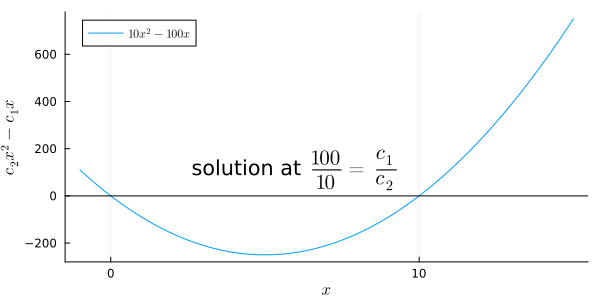

In [174]:
#| echo: false
#| fig-cap: the ratio of a coefficients in polynomial determines that polynomial's solutions

plot(x->10x^2 - 100x, -1, 15,
    ygrid=false,
    xticks=[0,10],
    label=L"10x^2 - 100x",
    ylabel=L"c_2x^2 - c_1x",
    xlabel=L"x",
    size=(600,300),
)
hline!([0], c=:black, label="")
annotate!(6, 110, "solution at " * L"\frac{100}{10} = \frac{c_1}{c_2}")

We can also plot the characteristic polynomials of our generative ancestries. 

First note that they have very different solutions. The modular case has solutions at $\{0, 6\}$, the star case has solutions at $\{1, 17\}$, and the hierarchical case is the only case with more than two non-zero solutions $\{1, 3, 11\}$. 

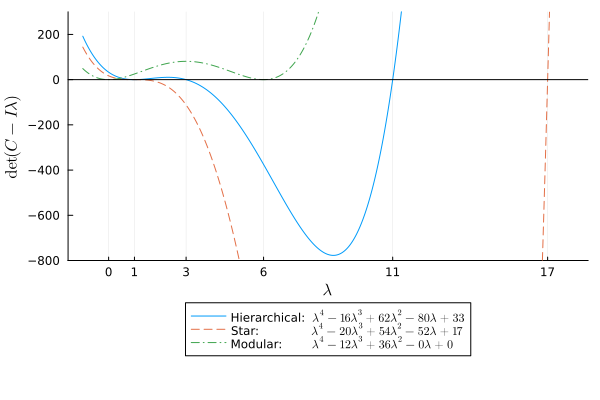

In [39]:
#| echo: false
#| fig-cap: "Determinant of different generative ancestries"
hf(x) = x^4 - 16x^3 + 62x^2 - 80x + 33
sf(x) = x^4 - 20x^3 + 54x^2 - 52x + 17
mf(x) = x^4 - 12x^3 + 36x^2

plot(
    ylabel = L"\det(C - Iλ)", 
    xlabel=L"λ", ylims=(-800, 300), 
    xticks=[0,1,3,6,11,17], 
    ygrid=false,
    legend=:outerbottom,
)
plot!(hf, -1:0.01:18, linestyle=:solid, label=rpad("Hierarchical:", 15) * L"λ^4 - 16 λ^3 + 62 λ^2 - 80 λ + 33")
plot!(sf, -1:0.01:18, linestyle=:dash, label=rpad("Star: ", 19) * L"λ^4 - 20 λ^3 + 54 λ^2 - 52 λ + 17")
plot!(mf, -1:0.01:18, linestyle=:dashdot, label=rpad("Modular:", 16) * L"λ^4 - 12 λ^3 + 36 λ^2 - 0λ + 0")
hline!([0], label="", c=:black)

Next, recall that these roots of the characteristic polynomial are the only values of $\lambda$ that can set $\det(C - I\lambda) = 0$ and by extension the only values of $\lambda$ where $\vec{v}$ is non-zero in the original eigenvector equation $C\vec{v} = \lambda \vec{v}$.

The insight to have is that the values of the similarity feeding though all the algebraic steps we have done and are controlling where the determinant is crossing zero. And importance of this insight is that the different distribution's of solutions can inform us of the different generative ancestries for these current extant populations. We can look at the eigenvector / left singular value solutions corresponding to these eigenvalue solutions to the characteristic polynomial to observe this relationship.

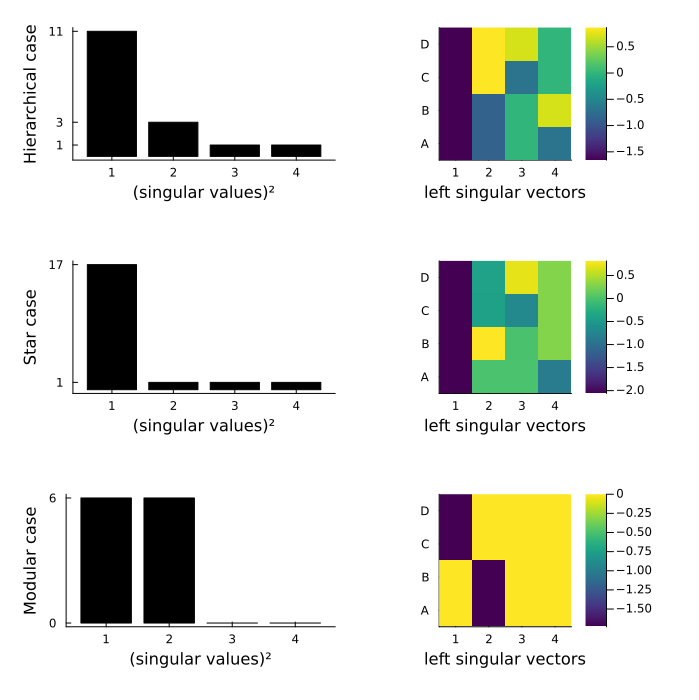

In [173]:
#| echo: false
#| fig-cap: plot of squared singular values equal to solutions of the characteristic polynomial (left) and their corresponding left singular vectors (right) for each generative ancestry. We see the left singular vectors matching the groupings produced by the generative ancestries in each case.

M_h = [
    1 0 1 1 0 1
    1 0 1 1 1 0
    0 1 0 1 1 1
    0 1 1 0 1 1
]

usv_h = svd(M_h)

p_ev_h = bar(usv_h.S .^ 2,
    ylabel="Hierarchical case",
    xlabel="(singular values)²",
    c=:black,
    yticks=[1,3,11],
    label="",
    grid=false,
)

p_lsv_h = heatmap(usv_h.U * diagm(usv_h.S), 
    xlabel="left singular vectors",
    c=:viridis, 
    ratio=1, 
    yticks=(1:4, "ABCD"), 
    xlims=(.5, 4.5), 
    grid=false)
p_h = plot(p_ev_h, p_lsv_h, size=(700, 300), margin=5Plots.Measures.mm)

M_s = [
    1 1 0 1 1 1
    1 1 1 0 1 1
    1 1 1 1 0 1
    1 1 1 1 1 0
]

usv_s = svd(M_s)

p_ev_s = bar(usv_s.S .^ 2,
    ylabel="Star case",
    xlabel="(singular values)²",
    c=:black,
    yticks=[1, 17],
    label="",
    grid=false,
)

p_lsv_s = heatmap(usv_s.U * diagm(usv_s.S), 
    xlabel="left singular vectors",
    c=:viridis, 
    ratio=1, 
    yticks=(1:4, "ABCD"), 
    xlims=(.5, 4.5), 
    grid=false)
p_s = plot(p_ev_s, p_lsv_s, size=(700, 300), margin=5Plots.Measures.mm)

M_m = [
    1 1 1 0 0 0
    1 1 1 0 0 0
    0 0 0 1 1 1
    0 0 0 1 1 1
]

usv_m = svd(M_m)

p_ev_m = bar(usv_m.S .^ 2,
    ylabel="Modular case",
    xlabel="(singular values)²",
    c=:black,
    yticks=[0,6],
    label="",
    grid=false,
)

p_lsv_m = heatmap(usv_m.U * diagm(usv_m.S), 
    xlabel="left singular vectors",
    c=:viridis, 
    ratio=1, 
    yticks=(1:4, "ABCD"), 
    xlims=(.5, 4.5), 
    grid=false)
p_m = plot(p_ev_m, p_lsv_m, size=(700, 300), margin=5Plots.Measures.mm)

plot(p_h, p_s, p_m, layout=grid(3,1), size=(700,700))

Here the star and hierarchical cases which both started from a common ancestor show that at the largest scales of variance, eigenvalue solutions at $17$ and $11$ respectively, all taxa are indistinguishable from each other, i.e. vary together perfectly. Below that scale, the two cases are different. The star case shows a single scale of variance with $3$ component vectors describing that scale. $3$ is the minimum number of linear axes needed to describe $4$ equidistant groups. And we can see in the individual components describing each taxa as distinct from the others in based on the differences of color. This hierarchical case we see $2$ scales of variance at $3$ and $1$ at the first scale the first generational split is described and the last two components describe the second generations bifurcations (between taxa C,D and A,B respectively). In the modular case there is only one non-zero scale of variance, at scale $3$ which perfectly describes the original independent populations.

## Major takaways

When analyzing biological data, there is inherently non-independence between our sample. This can be because of many causes: shared evolutionary history, convergent evolution (i.e. constraints of physics), molecular interactions forming pathways, and environmental similarity. This math tells us what to expect when we factorize these non-independent populations and datasets. 

Contrary to past theory that was developed on independently randomized matrices, we should not expect a clean "signal" and "noise" region, only in the modular (independent) case did we observe such phenomena. 

When we have shared similarity across our samples, this means that the off-diagonal terms of our similarity matrix will all be non-zero, and so the coefficients of the characteristic polynomial will also be non-zero. And because the polynomial has up to the $n$th order terms and the solutions are determined by ratios those terms, we should instead expect a power-law scaling distribution of solutions. The $k$th eigenvalue might be very small, but it is only when it deviates from this power-law distribution that we should assume it is noise. 

These insights are crucially important for understanding where we can find signal in biological data, and for understanding the generative processes for these data. 